# Stream of Consciousness Data Exploration

In [45]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
%matplotlib inline

In [33]:
pd.set_option('display.max_columns', None)

In [11]:
col_desc = pd.read_csv("../data/column_desc.tsv", delimiter="\t")

In [12]:
col_desc

,name,desc
0,PatientIdentifier,unique patient id
1,bhr,basal heart rate
2,basebp,basal blood pressure
3,basedp,basal double product (= bhr x basebp)
4,pkhr,peak heart rate
5,sbp,systolic blood pressure
6,dp,double product (= pkhr x sbp)
7,maxhr,maximum heart rate
8,pctMphr,% of maximum predicted heart rate achieved
9,mbp,maximum blood pressure


In [2]:
d = pd.read_csv("../data/data.csv")

In [110]:
d.index = d['PatientIdentifier']

In [114]:
d = d.drop(columns=['PatientIdentifier'])

In [115]:
d.describe()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofMI,hxofPTCA,hxofCABG,any.event
count,556.000000,556.000000,543.000000,555.000000,540.000000,540.000000,545.000000,534.000000,541.000000,552.000000,548.000000,539.000000,540.000000,548.000000,549.000000,539.000000,558.000000,558.000000,558.000000,540.000000,541.000000,556.000000,552.000000,539.000000,553.000000,550.000000
mean,74.519784,135.293165,10223.066298,120.643243,147.035185,17653.733333,119.306422,78.561798,155.615527,18547.702899,30.237226,68.834879,55.511111,0.304745,0.460838,0.244898,0.050179,0.048387,0.059140,0.040741,0.706100,0.370504,0.277174,0.076067,0.159132,0.161818
std,17.622200,20.799567,2588.827924,22.584033,36.682824,5242.508552,22.014694,15.227201,31.699341,4912.162667,9.543431,16.255986,10.420913,0.460720,0.498919,0.430426,0.218510,0.214775,0.236098,0.197872,0.455968,0.483375,0.448009,0.265351,0.366130,0.368619
min,-42.000000,85.000000,5000.000000,52.000000,40.000000,5100.000000,58.000000,38.000000,84.000000,7130.000000,5.000000,26.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,120.000000,8426.000000,106.500000,120.000000,14039.000000,104.000000,69.000000,133.000000,15257.250000,20.000000,60.500000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,133.000000,9860.000000,122.000000,142.000000,17090.000000,120.000000,78.000000,150.000000,18118.000000,30.000000,69.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,150.000000,11698.000000,135.500000,170.000000,20648.250000,133.000000,89.000000,175.000000,21259.000000,40.000000,76.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,210.000000,203.000000,27300.000000,210.000000,309.000000,45114.000000,200.000000,133.000000,309.000000,45114.000000,40.000000,167.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
d.head()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,gender,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofCig,hxofMI,hxofPTCA,hxofCABG,any.event,ecg
PatientIdentifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5b58e040ee35f3bcc6023fb7836c842e,92.0,103.0,9476.0,114.0,86.0,9804.0,100.0,NaN,121.0,12100.0,40.0,85.0,male,27.0,0.0,0.0,0.0,0,0,0,0.0,NaN,0.0,non-smoker,1.0,1.0,0.0,0.0,normal
0e4033b8c0b56afbea35dc749ced4e1d,62.0,139.0,8618.0,120.0,158.0,18960.0,120.0,82.0,158.0,18960.0,40.0,73.0,male,39.0,0.0,0.0,0.0,1,0,0,0.0,NaN,1.0,non-smoker,1.0,0.0,0.0,1.0,equivocal
d19d62a873f08af0488f0df720cfd293,62.0,139.0,8618.0,120.0,157.0,18840.0,120.0,82.0,157.0,18840.0,40.0,73.0,male,39.0,0.0,0.0,NaN,1,0,0,NaN,0.0,1.0,non-smoker,1.0,0.0,0.0,1.0,equivocal
00713fac580bcb0691658403f8e6f4e3,93.0,118.0,10974.0,118.0,105.0,12390.0,118.0,72.0,105.0,12390.0,30.0,57.0,female,42.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
ee340e888492be0703f2bcc9abfb390c,89.0,103.0,9167.0,129.0,173.0,22317.0,129.0,69.0,176.0,22704.0,40.0,34.0,male,45.0,1.0,1.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,NaN,0.0,equivocal


### Attribution plan:

- bhr - mean
- basebp - mean
- basedp - bhr*basebp
- pkhr
- sbp
- dp - pkhr * sbp
- maxhr - mean

- chestpain - mostpopular
- restwma - mostpopular
- 

In [117]:
d.dtypes

bhr          float64
basebp       float64
basedp       float64
pkhr         float64
sbp          float64
dp           float64
maxhr        float64
pctMphr      float64
mbp          float64
dpmaxdo      float64
dobdose      float64
age          float64
gender        object
baseEF       float64
chestpain    float64
restwma      float64
posSE        float64
newMI          int64
newPTCA        int64
newCABG        int64
death        float64
hxofHT       float64
hxofDM       float64
hxofCig       object
hxofMI       float64
hxofPTCA     float64
hxofCABG     float64
any.event    float64
ecg           object
dtype: object

## Notes

1. Check for missing values
2. How to impute values?
3. Which colums are categorical / numeric?


In [119]:
d.index.nunique()

558

In [120]:
d.isna().any()

bhr           True
basebp        True
basedp        True
pkhr          True
sbp           True
dp            True
maxhr         True
pctMphr       True
mbp           True
dpmaxdo       True
dobdose       True
age           True
gender       False
baseEF        True
chestpain     True
restwma       True
posSE         True
newMI        False
newPTCA      False
newCABG      False
death         True
hxofHT        True
hxofDM        True
hxofCig      False
hxofMI        True
hxofPTCA      True
hxofCABG      True
any.event     True
ecg          False
dtype: bool

In [121]:
d.shape

(558, 29)

In [122]:
d.dropna().shape

(346, 29)

Histogram of float64 bhr
Histogram of float64 basebp
Histogram of float64 basedp
Histogram of float64 pkhr
Histogram of float64 sbp
Histogram of float64 dp
Histogram of float64 maxhr
Histogram of float64 pctMphr
Histogram of float64 mbp
Histogram of float64 dpmaxdo
Histogram of float64 dobdose
Histogram of float64 age
Col gender has 2 unique values.
Histogram of float64 baseEF
Histogram of float64 chestpain
Histogram of float64 restwma
Histogram of float64 posSE
Histogram of int64 newMI
Histogram of int64 newPTCA
Histogram of int64 newCABG
Histogram of float64 death
Histogram of float64 hxofHT
Histogram of float64 hxofDM


/Users/william/miniconda3/envs/vituity/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Col hxofCig has 3 unique values.
Histogram of float64 hxofMI
Histogram of float64 hxofPTCA
Histogram of float64 hxofCABG
Histogram of float64 any.event
Col ecg has 3 unique values.


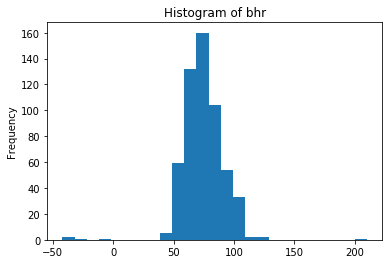

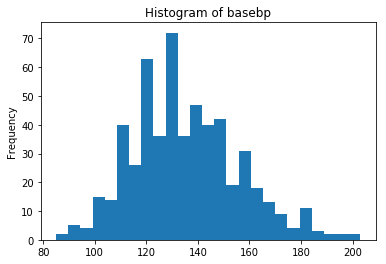

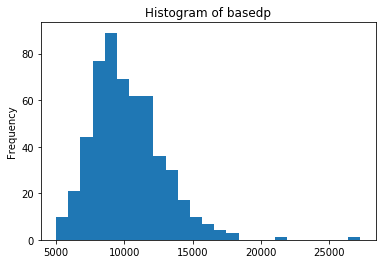

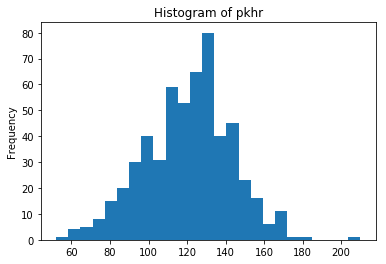

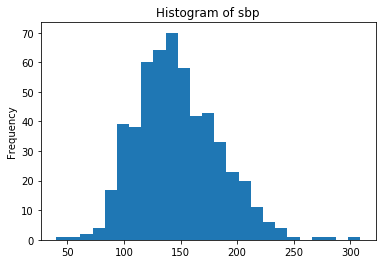

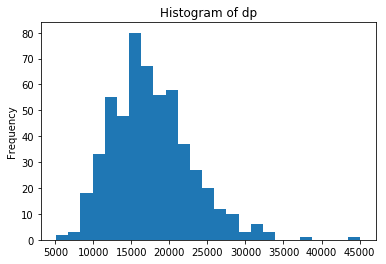

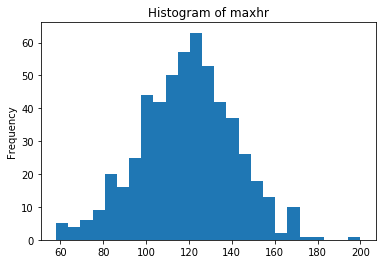

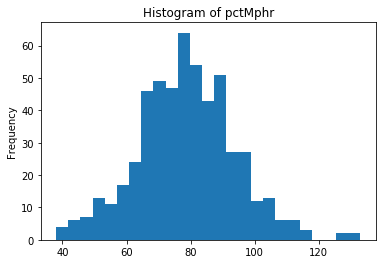

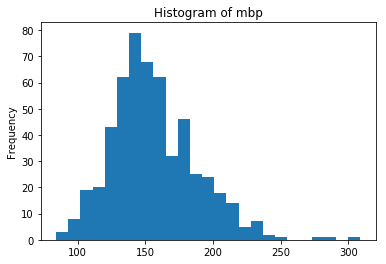

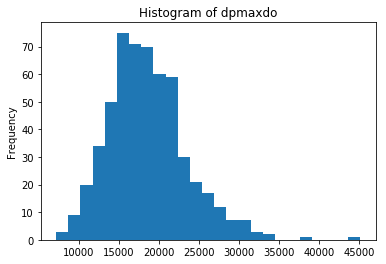

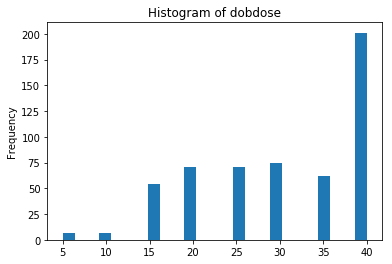

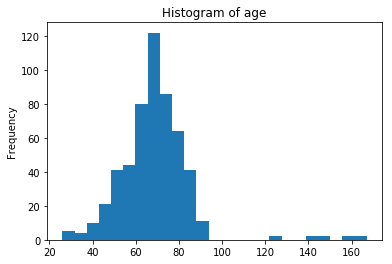

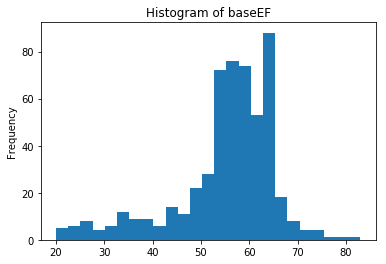

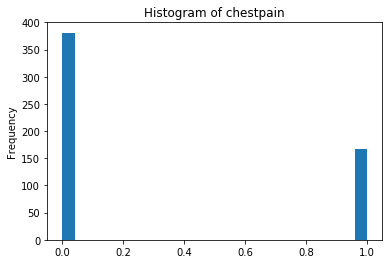

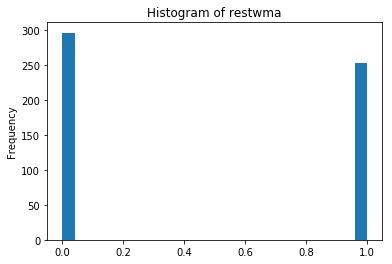

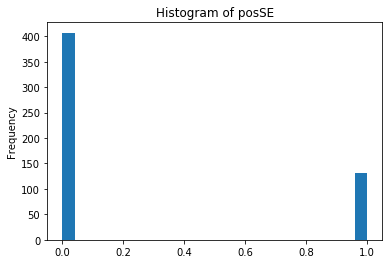

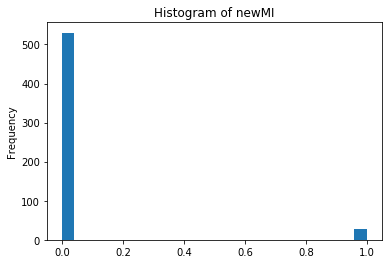

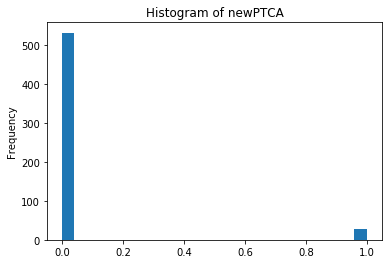

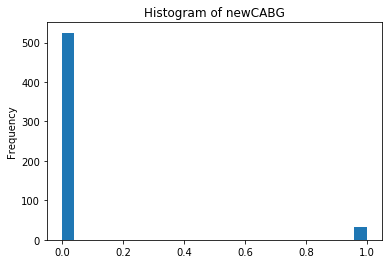

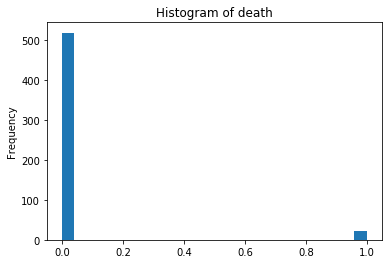

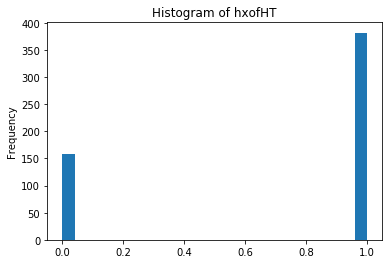

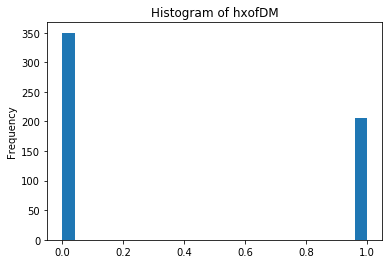

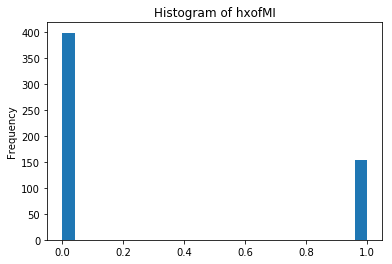

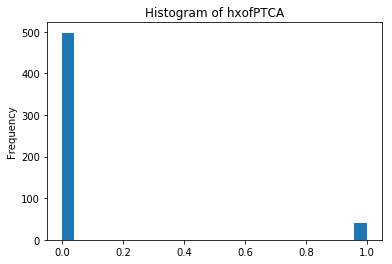

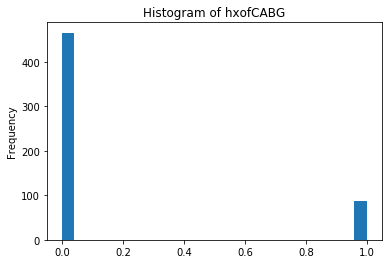

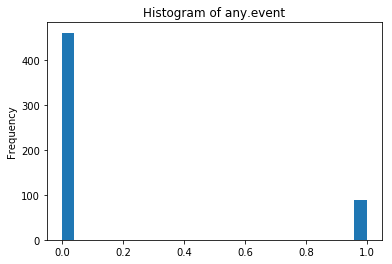

In [123]:
for col,col_type in zip(d.columns, d.dtypes):
    if col_type == "float64":
        plt.figure()
        print(f"Histogram of {col_type} {col}")
        d[col].plot(kind="hist",bins=25)
        plt.title(f"Histogram of {col}")
    if col_type == "int64":
        plt.figure()
        print(f"Histogram of {col_type} {col}")
        d[col].plot(kind="hist",bins=25)
        plt.title(f"Histogram of {col}")
    if col_type == "object":
        print(f"Col {col} has {d[col].nunique()} unique values.")

In [124]:
d.mean()

bhr             74.519784
basebp         135.293165
basedp       10223.066298
pkhr           120.643243
sbp            147.035185
dp           17653.733333
maxhr          119.306422
pctMphr         78.561798
mbp            155.615527
dpmaxdo      18547.702899
dobdose         30.237226
age             68.834879
baseEF          55.511111
chestpain        0.304745
restwma          0.460838
posSE            0.244898
newMI            0.050179
newPTCA          0.048387
newCABG          0.059140
death            0.040741
hxofHT           0.706100
hxofDM           0.370504
hxofMI           0.277174
hxofPTCA         0.076067
hxofCABG         0.159132
any.event        0.161818
dtype: float64

In [125]:
d.columns

Index(['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'maxhr', 'pctMphr',
       'mbp', 'dpmaxdo', 'dobdose', 'age', 'gender', 'baseEF', 'chestpain',
       'restwma', 'posSE', 'newMI', 'newPTCA', 'newCABG', 'death', 'hxofHT',
       'hxofDM', 'hxofCig', 'hxofMI', 'hxofPTCA', 'hxofCABG', 'any.event',
       'ecg'],
      dtype='object')

In [126]:
categorical_columns = ['gender',
                       'ecg',
                       'chestpain',
                       'restwma',
                       'posSE',
                       'newMI',
                       'newPTCA',
                       'newCABG',
                       'death',
                       'hxofCig',
                       'hxofHT',
                      'hxofDM',
                      'hxofMI',
                      'hxofPTCA',
                      'hxofCABG',
                       'any.event'
                      ]
d[categorical_columns].mode().iloc[0]

gender           female
ecg              normal
chestpain             0
restwma               0
posSE                 0
newMI                 0
newPTCA               0
newCABG               0
death                 0
hxofCig      non-smoker
hxofHT                1
hxofDM                0
hxofMI                0
hxofPTCA              0
hxofCABG              0
any.event             0
Name: 0, dtype: object

In [372]:
numeric_columns = list(set(d.columns) - set(categorical_columns))
numeric_columns

['sbp',
 'baseEF',
 'dpmaxdo',
 'mbp',
 'basebp',
 'basedp',
 'pctMphr',
 'dobdose',
 'dp',
 'maxhr',
 'pkhr',
 'age',
 'bhr']

In [128]:
d['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

In [129]:
d['ecg'].value_counts()

normal       311
equivocal    176
MI            71
Name: ecg, dtype: int64

In [130]:
d['hxofCig'].value_counts()

non-smoker    298
moderate      138
heavy         122
Name: hxofCig, dtype: int64

In [131]:
dc = d.fillna(d[categorical_columns].mode().iloc[0])
dc = dc.fillna(d[numeric_columns].mean())

In [132]:
dc.describe()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofMI,hxofPTCA,hxofCABG,any.event
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,74.519784,135.293165,10223.066298,120.643243,147.035185,17653.733333,119.306422,78.561798,155.615527,18547.702899,30.237226,68.834879,55.511111,0.299283,0.453405,0.236559,0.050179,0.048387,0.059140,0.039427,0.715054,0.369176,0.274194,0.073477,0.157706,0.159498
std,17.590534,20.762192,2553.731480,22.523132,36.085236,5157.104510,21.756273,14.895535,31.211850,4885.634142,9.457375,15.976324,10.251149,0.458355,0.498271,0.425351,0.218510,0.214775,0.236098,0.194782,0.451794,0.483015,0.446507,0.261151,0.364792,0.366469
min,-42.000000,85.000000,5000.000000,52.000000,40.000000,5100.000000,58.000000,38.000000,84.000000,7130.000000,5.000000,26.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,120.000000,8467.000000,107.000000,122.000000,14220.000000,105.000000,70.000000,134.000000,15261.000000,25.000000,61.000000,52.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,133.000000,9940.500000,122.000000,143.000000,17243.000000,120.000000,78.561798,151.000000,18202.000000,30.000000,68.917440,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,150.000000,11652.000000,135.000000,170.000000,20568.000000,133.000000,88.000000,174.000000,21197.500000,40.000000,76.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,210.000000,203.000000,27300.000000,210.000000,309.000000,45114.000000,200.000000,133.000000,309.000000,45114.000000,40.000000,167.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
dc['any.event'].value_counts()

0.0    469
1.0     89
Name: any.event, dtype: int64

In [134]:
dc['any.event'].value_counts()

0.0    469
1.0     89
Name: any.event, dtype: int64

In [135]:
dc['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

In [136]:
d['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

In [137]:
d.groupby(by='gender')['any.event'].value_counts()

gender  any.event
female  0.0          287
        1.0           46
male    0.0          174
        1.0           43
Name: any.event, dtype: int64

In [139]:
dcd = pd.get_dummies(dc)

In [140]:
targets = ['any.event','death','newMI','newPTCA','newCABG']

In [141]:
dcd.columns

Index(['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'maxhr', 'pctMphr',
       'mbp', 'dpmaxdo', 'dobdose', 'age', 'baseEF', 'chestpain', 'restwma',
       'posSE', 'newMI', 'newPTCA', 'newCABG', 'death', 'hxofHT', 'hxofDM',
       'hxofMI', 'hxofPTCA', 'hxofCABG', 'any.event', 'gender_female',
       'gender_male', 'hxofCig_heavy', 'hxofCig_moderate',
       'hxofCig_non-smoker', 'ecg_MI', 'ecg_equivocal', 'ecg_normal'],
      dtype='object')

In [142]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = dcd[list(set(dcd.columns) - set(targets))]
y = dcd['any.event']

In [153]:
X = X.clip(lower=0)

In [154]:
X.shape

(558, 29)

In [155]:
dcd.shape

(558, 34)

In [157]:
skb = SelectKBest(chi2, k=5).fit(X, y)

In [162]:
for name, p in zip(list(set(dcd.columns) - set(targets)),skb.pvalues_):
    print(f"{name} - {p}")

sbp - 2.0303339887545705e-07
baseEF - 8.452047576359007e-13
hxofPTCA - 0.29393166837867374
hxofCig_non-smoker - 0.3815757561923494
chestpain - 0.1786365083597644
hxofCig_heavy - 0.2614753673690545
mbp - 0.002502233615202182
dobdose - 0.001486205431103295
gender_male - 0.14522751494533803
hxofHT - 0.12035358384333882
age - 0.02863980268078268
bhr - 0.9376193256648961
ecg_MI - 0.00015404320975145338
ecg_normal - 0.02371346544800147
hxofMI - 0.0002476914101283388
dpmaxdo - 0.0
hxofCABG - 0.08248551702682552
gender_female - 0.23993552263257567
pctMphr - 0.10931970996629083
hxofCig_moderate - 0.8180957722377636
maxhr - 0.002270952354540718
restwma - 1.3407846394330313e-05
ecg_equivocal - 0.5466038370530005
basebp - 0.15544896147150228
basedp - 1.281630180102249e-162
dp - 0.0
hxofDM - 0.03396496850391589
pkhr - 0.0001600966852160144
posSE - 1.2519223476031758e-08


In [166]:
best_features = pd.DataFrame({'score':skb.scores_, 'pv':skb.pvalues_, 'col':list(set(dcd.columns) - set(targets))})

In [168]:
best_features.sort_values(by='score',ascending=False)

,score,pv,col
25,8681.510010,0.000000e+00,dp
15,5496.595736,0.000000e+00,dpmaxdo
24,738.482425,1.281630e-162,basedp
1,51.174241,8.452048e-13,baseEF
28,32.404562,1.251922e-08,posSE
0,27.004014,2.030334e-07,sbp
21,18.951576,1.340785e-05,restwma
12,14.322131,1.540432e-04,ecg_MI
27,14.249578,1.600967e-04,pkhr
14,13.429551,2.476914e-04,hxofMI


Text(0.5,1,'Chi2 dim. red')

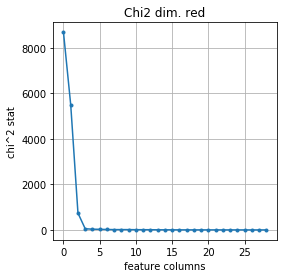

In [195]:
plt.figure(1, figsize=(4, 4))
best_features.sort_values(by='score',ascending=False).reset_index()['score'].plot(kind='line',marker='.')
plt.grid()
plt.axis('tight')
plt.xlabel('feature columns')
plt.ylabel('chi^2 stat')
plt.title('Chi2 dim. red')

In [169]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [170]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


Text(0.5,1,'PCA dim. red.')

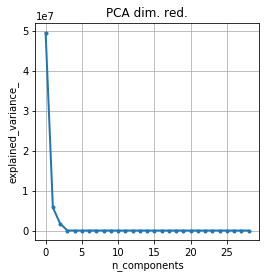

In [192]:
pca.fit(X)

plt.figure(1, figsize=(4, 4))
plt.plot(pca.explained_variance_, linewidth=2,marker='.')
plt.grid()
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.title('PCA dim. red.')

In [196]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

[]

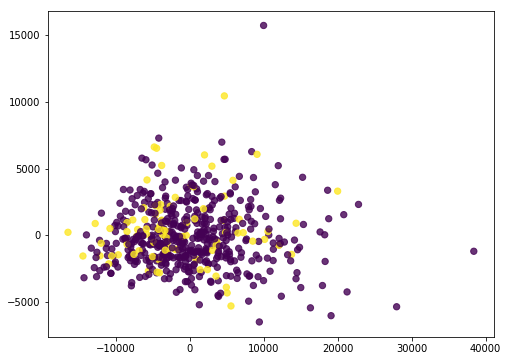

In [212]:
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, alpha=0.8)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [213]:
# Split data into test/train

In [352]:
y.mean()

0.15949820788530467

In [347]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=134)

In [348]:
X.shape

(558, 29)

In [349]:
y_train.value_counts()

0.0    351
1.0     67
Name: any.event, dtype: int64

In [350]:
y_test.value_counts()

0.0    118
1.0     22
Name: any.event, dtype: int64

In [351]:
# Assert that test and train have the same ratio of death events
round(y_test.mean(),2) == round(y_train.mean(),2)

True

In [308]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [326]:
ss = StandardScaler()
lr = LogisticRegression(penalty='l1',class_weight='balanced',solver='liblinear',)

pipe = Pipeline(steps = [
    ('reduce_dim', SelectKBest(chi2)),
    ('scaler', ss),
    ('logistic', lr)
])

In [327]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=10, score_func=<function chi2 at 0x1a1d2d5620>)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [303]:
pipe.steps[1][1].coef_

array([[ 0.        , -0.22444747,  0.01049083,  0.        , -0.07317472,
        -0.05029978,  0.21706336, -0.19021242,  0.05892978,  0.18104073,
         0.28803436, -0.41075147,  0.36524397,  0.        ,  0.56988607,
         0.01482127, -0.21904536, -0.10392727,  0.        ,  0.10067821,
         0.        , -0.13500296, -0.16528   , -0.63089983,  0.83537672,
        -0.26736132,  0.34623496, -0.14321084,  0.78802027]])

In [292]:
for name, p in zip(list(set(dcd.columns) - set(targets)), pipe.steps[1][1].coef_[0]):
    print(f"{name} - {p}")

sbp - 0.0
baseEF - -0.22444984618185682
hxofPTCA - 0.01049340557492097
hxofCig_non-smoker - 0.0
chestpain - -0.07317553411699079
hxofCig_heavy - -0.050309964516518785
mbp - 0.21719432359426896
dobdose - -0.19020982054973115
gender_male - 0.008057739412211615
hxofHT - 0.1810375733030386
age - 0.2880308236142978
bhr - -0.4106743407438534
ecg_MI - 0.36524441458297036
ecg_normal - 0.0
hxofMI - 0.5698892615122813
dpmaxdo - 0.01453790178737468
hxofCABG - -0.21904544767833967
gender_female - -0.15479312759800376
pctMphr - 0.0
hxofCig_moderate - 0.1006645939993376
maxhr - 0.0
restwma - -0.13500906829004863
ecg_equivocal - -0.16528073562423812
basebp - -0.6308288422223491
basedp - 0.835273043601518
dp - -0.26726416253934654
hxofDM - 0.3462493178130577
pkhr - -0.14306396191794638
posSE - 0.7880142004978961


In [333]:
cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring='roc_auc', cv=5, n_jobs=-1)

array([0.88531187, 0.75      , 0.71098901, 0.73846154, 0.81098901])

In [328]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


In [360]:
param_grid = dict(reduce_dim__k=sp_randint(4,29),
                  logistic__C=uniform(loc=0, scale=4),
                  logistic__penalty=['l1','l2'])

grid_search = RandomizedSearchCV(pipe, scoring='recall',param_distributions=param_grid,n_iter=1000, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=10, score_func=<function chi2 at 0x1a1d2d5620>)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=1000, n_jobs=-1,
          param_distributions={'reduce_dim__k': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e71a128>, 'logistic__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e71a780>, 'logistic__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='recall', verbose=0)

In [361]:
grid_search.best_params_

{'logistic__C': 0.06428096149720997,
 'logistic__penalty': 'l1',
 'reduce_dim__k': 27}

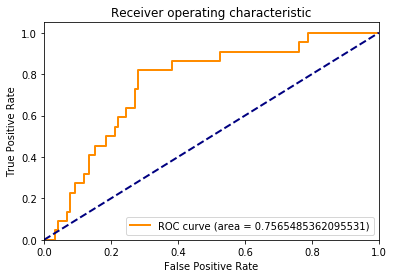

0.7565485362095531

In [365]:
plot_roc(grid_search.predict_proba(X_test), y_test)

In [294]:
y_hat = pipe.predict_proba(X_test)

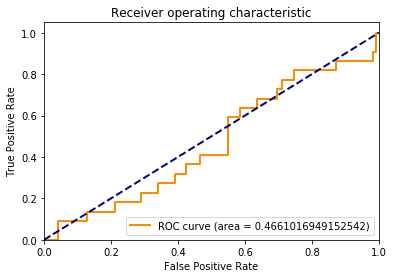

0.4661016949152542

In [364]:
plot_roc(y_hat,y_test)

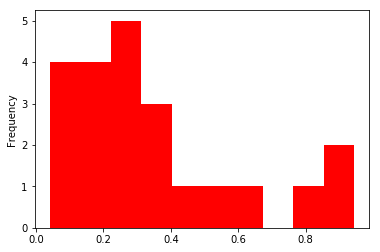

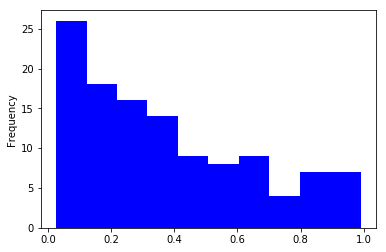

In [371]:
scores = pd.DataFrame({'scores':y_hat[:,1], 'labels': y_test})
plt.figure()
scores[scores['labels'] == 1.0]['scores'].plot(kind='hist',color='r')
plt.figure()
scores[scores['labels'] == 0.0]['scores'].plot(kind='hist',color='b')

In [324]:
def plot_roc(y_hat, y):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    fpr, tpr, thresholds = roc_curve(y_test, y_hat[:,1], pos_label=1)
    roc_auc = roc_auc_score(y_test, y_hat[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label=f'ROC curve (area = {roc_auc:2})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc